Подключим библиотеку и установим дефолтные настройки. Считаем данные

In [2]:
import pandas as pd
import matplotlib as mlp

mlp.rcParams['lines.linewidth'] = 5
mlp.rcParams['xtick.major.size'] = 20
mlp.rcParams['xtick.major.width'] = 5
mlp.rcParams['xtick.labelsize'] = 20
mlp.rcParams['xtick.color'] = '#FF5533'

mlp.rcParams['ytick.major.size'] = 20
mlp.rcParams['ytick.major.width'] = 5
mlp.rcParams['ytick.labelsize'] = 20
mlp.rcParams['ytick.color'] = '#FF5533'

mlp.rcParams['axes.labelsize'] = 20
mlp.rcParams['axes.titlesize'] = 20
mlp.rcParams['axes.titlecolor'] = '#00B050'
mlp.rcParams['axes.labelcolor'] = '#00B050'

data = pd.read_csv('data/ks.csv')

data = data[data['Состояние'].isin(['successful', 'failed'])]

data.head()

,Название,Категория,Главная категория,Валюта,Дедлайн,Дата публикации,Состояние,Инвесторов,Страна,Собрано в долларах,Цель в долларах
0,"Don't Call it a Comeback ""Telescopes""",Music,Music,USD,2013-01-10,2012-12-09 06:03:52,successful,23,US,600.00,600.0
3,Me & You Coordinating Sunglasses- Optical Qual...,Accessories,Fashion,USD,2016-11-18,2016-10-19 22:06:41,failed,20,US,502.00,10000.0
4,New Carts for Istanbul Street Food Vendors,Food,Food,USD,2015-05-17,2015-04-17 18:10:47,successful,62,US,2414.00,1400.0
5,New Improv Comedy Venue in Des Moines,Theater,Theater,USD,2013-06-17,2013-05-03 16:17:21,successful,86,US,10030.88,10000.0
6,The Seer and the Sword,Shorts,Film & Video,USD,2012-08-11,2012-07-12 05:19:53,failed,0,US,0.00,10000.0


Проверим признак **Главная категория**

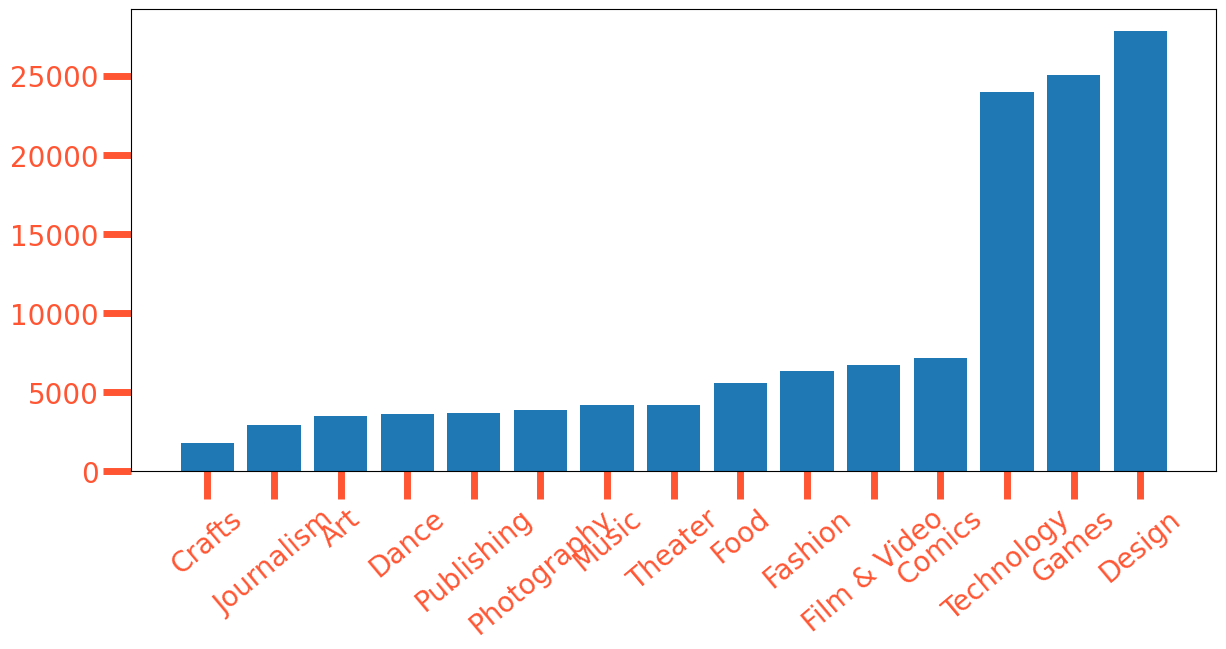

In [11]:
import matplotlib.pyplot as plt

main_category = data.groupby('Главная категория')['Собрано в долларах'].mean()
main_category = main_category.sort_values()

fig = plt.figure()
fig.set_size_inches(14, 6)

plt.bar(main_category.index, main_category)
plt.xticks(rotation=40)

plt.show()

Посмотрим, сколько элементов находится в каждой категории

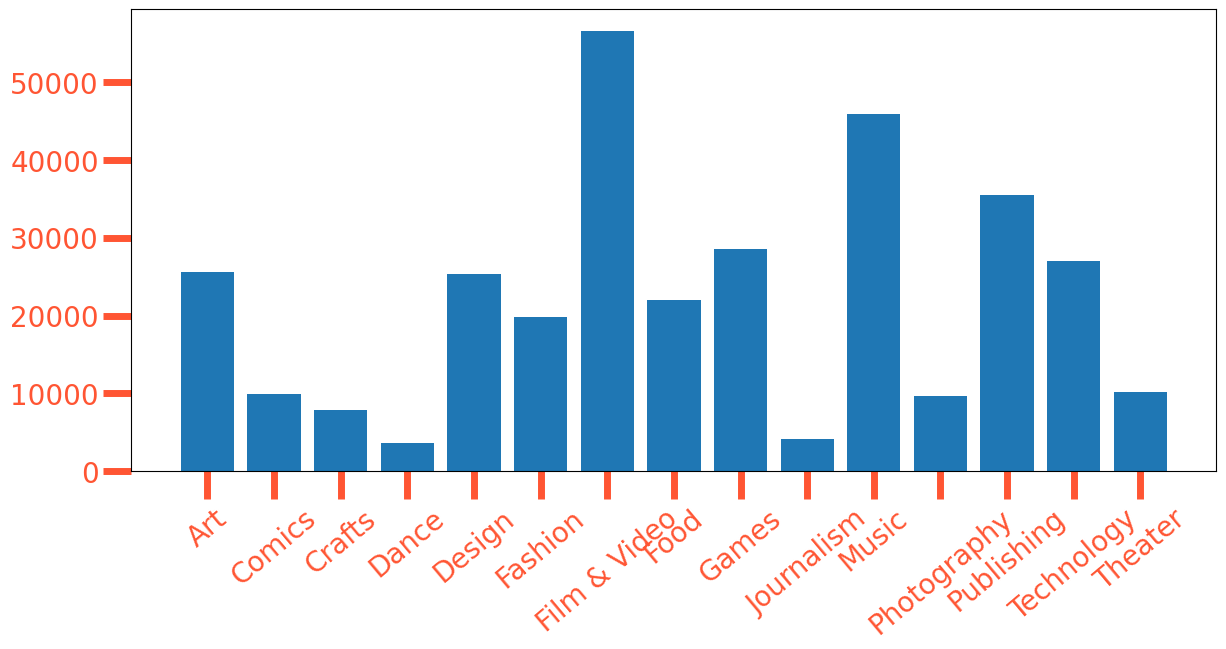

In [13]:
main_category_count = data.groupby('Главная категория')['Собрано в долларах'].count()

fig = plt.figure()
fig.set_size_inches(14, 6)

plt.bar(main_category_count.index, main_category_count)
plt.xticks(rotation=40)

plt.show()

Видно, что для каждой категории достаточно большое количество наблюдений. Можно сделать вывод, что признак **Главная категория** важен

Построим boxplots для категории **Валюта**

In [14]:
currency_dict = {}

for currency in data['Валюта'].unique():
    currency_dict[currency] = data[data['Валюта'] == currency]['Собрано в долларах']

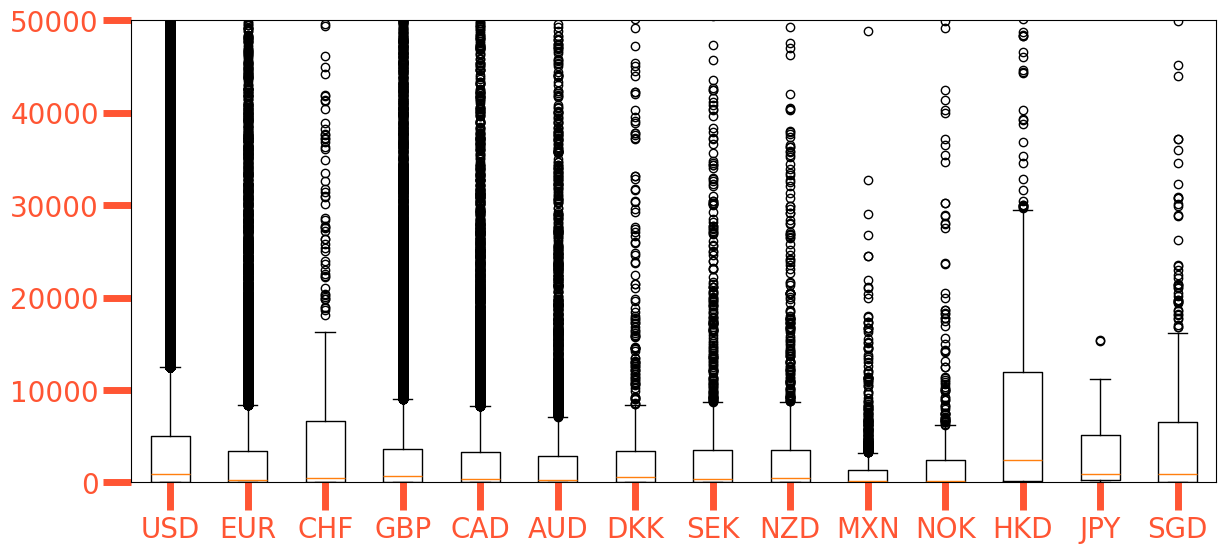

In [17]:
fig = plt.figure()
fig.set_size_inches(14, 6)

plt.boxplot(currency_dict.values(), labels=currency_dict.keys())

plt.ylim((0, 50000))

plt.show()

Ящики разных валют отличаются. Признак оставляем

Построим матрицу корреляций признаков между собой и таргетом на подготовленных данных

In [18]:
data = pd.read_csv('output/processed_data.csv', sep=';', index_col=0)

data.head()

,Категория,таргет,Цель в долларах,Срок,Год публикации,Close_brent,CAD,CHF,DKK,EUR,...,Design,Fashion,Film & Video,Food,Journalism,Music,Photography,Publishing,Technology,Theater
176128,6035.989239,625.0,1000.0,39,2009,34.41,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
241929,3591.033473,22.0,80000.0,87,2009,34.41,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
244460,3661.424550,35.0,20.0,8,2009,34.41,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
80845,4321.245721,145.0,99.0,79,2009,34.41,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
181197,6035.989239,387.0,1900.0,28,2009,34.41,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [23]:
# Оставим только вещественные колонки

cols_to_check = ['Цель в долларах', 'Срок', 'Год публикации', 'Close_brent', 'таргет']
corr_matrix = data[cols_to_check].corr()
corr_matrix

,Цель в долларах,Срок,Год публикации,Close_brent,таргет
Цель в долларах,1.000000,0.021607,0.012320,0.000481,0.006354
Срок,0.021607,1.000000,-0.171189,-0.070870,0.008651
Год публикации,0.012320,-0.171189,1.000000,0.686868,0.025158
Close_brent,0.000481,-0.070870,0.686868,1.000000,0.019516
таргет,0.006354,0.008651,0.025158,0.019516,1.000000


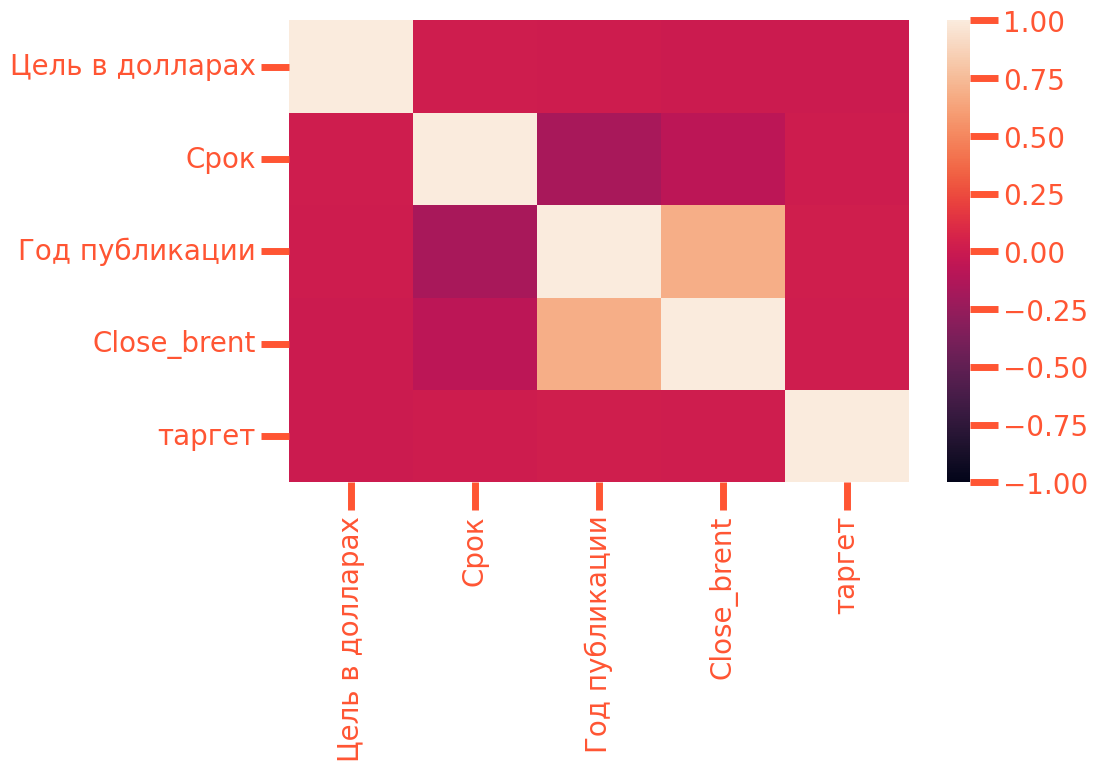

In [29]:
# Изобразим в виде Тепловой карты

import seaborn as sns

fig = plt.figure()
fig.set_size_inches(10, 6)

sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns, vmin=-1, vmax=1)

plt.show()

Между собой признаки не коррелируют. С таргетной переменной также нет линейной зависимости

In [31]:
# Посмотрим, есть ли константные колонки

from sklearn.feature_selection import VarianceThreshold

X = data.drop('таргет', axis=1)
variance = VarianceThreshold(threshold=0.1)
variance.fit(X)
X.head()

,Категория,Цель в долларах,Срок,Год публикации,Close_brent,CAD,CHF,DKK,EUR,GBP,...,Design,Fashion,Film & Video,Food,Journalism,Music,Photography,Publishing,Technology,Theater
176128,6035.989239,1000.0,39,2009,34.41,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
241929,3591.033473,80000.0,87,2009,34.41,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
244460,3661.424550,20.0,8,2009,34.41,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
80845,4321.245721,99.0,79,2009,34.41,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
181197,6035.989239,1900.0,28,2009,34.41,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
